In [384]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn
import csv

In [385]:
ride_path = "city_data.csv"
city_path = "ride_data.csv"

ride_pd = pd.read_csv(ride_path)
city_pd = pd.read_csv(city_path)

ride_df = pd.DataFrame(ride_pd)
city_df = pd.DataFrame(city_pd)

In [386]:
ride_df.head(2)

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban


In [387]:
city_df.head(2)

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942


In [388]:
city_type = ride_df
city_type = city_type.reset_index()
del city_type["driver_count"]
del city_type["index"]
city_type.head(2)

,city,type
0,Kelseyland,Urban
1,Nguyenbury,Urban


In [389]:
print("Min fare in data: " + str(city_df["fare"].min()))
print("Max fare in data: " + str(city_df["fare"].max()))
print("Mean fare in data: " + str(city_df["fare"].mean()))

Min fare in data: 4.05
Max fare in data: 59.65
Mean fare in data: 26.80055157894731


In [390]:
avg_fare = pd.DataFrame(city_df.groupby("city")["fare"].mean())
total_fare = pd.DataFrame(city_df.groupby("city")["fare"].sum())
avg_fare = avg_fare.rename(columns={"fare":"avg_fare"})

In [391]:
total_rides = pd.DataFrame(city_df.groupby("city")["city"].count())
total_rides = total_rides.rename(columns={"city":"total_rides"})

In [392]:
total_drivers_per_city = pd.DataFrame(ride_df.groupby("city")["driver_count"].sum())

In [393]:
new_df = pd.concat([avg_fare, total_rides, total_drivers_per_city], axis=1)
new_df = new_df.reset_index()
new_df = new_df.rename(columns={"city":"city_name"})
new_df["city_type"] = ""
new_df["city_type"] = city_type["type"]
new_df.head(2)

,city_name,avg_fare,total_rides,driver_count,city_type
0,Alvarezhaven,23.928710,31,21,Urban
1,Alyssaberg,20.609615,26,67,Urban


In [394]:
new_df["total_fare"] = new_df["avg_fare"] * new_df["total_rides"]
new_df.head(2)

,city_name,avg_fare,total_rides,driver_count,city_type,total_fare
0,Alvarezhaven,23.928710,31,21,Urban,741.79
1,Alyssaberg,20.609615,26,67,Urban,535.85


In [395]:
urban_df= new_df.loc[new_df["city_type"]== "Urban",:]
suburban_df= new_df.loc[new_df["city_type"]== "Suburban",:]
rural_df= new_df.loc[new_df["city_type"]== "Rural",:]

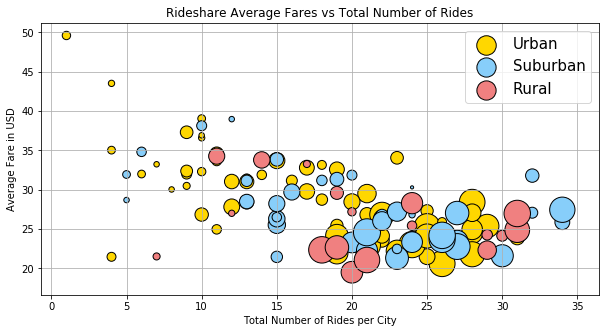

In [396]:
plt.scatter(urban_df.total_rides, urban_df.avg_fare, s=urban_df.driver_count*10, marker="o", facecolors="gold", edgecolors="black", label="Urban")
plt.scatter(suburban_df.total_rides, suburban_df.avg_fare, s=suburban_df.driver_count*10, marker="o", facecolors="lightskyblue", edgecolors="black", label="Suburban")
plt.scatter(rural_df.total_rides, rural_df.avg_fare, s=rural_df.driver_count*10, marker="o", facecolors="lightcoral", edgecolors="black", label="Rural")

plt.title("Rideshare Average Fares vs Total Number of Rides")
plt.xlabel("Total Number of Rides per City")
plt.ylabel("Average Fare in USD")
plt.grid(True)
plt.legend(loc=1, prop={'size': 15})
matplotlib.rc('figure', figsize=(10, 5))
plt.show()

In [397]:
total_urban_fare = urban_df["total_fare"].sum()
total_suburban_fare = suburban_df["total_fare"].sum()
total_rural_fare = rural_df["total_fare"].sum()

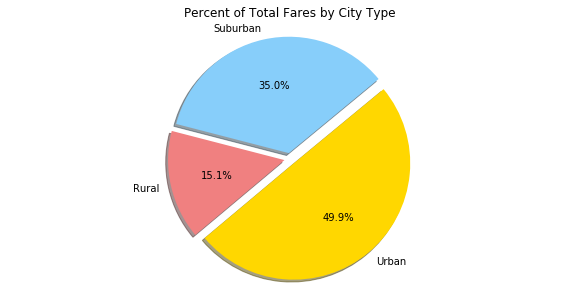

In [398]:
labels = ["Urban","Suburban","Rural"]
data = [total_urban_fare, total_suburban_fare, total_rural_fare]
colors = ['gold','lightskyblue','lightcoral']
explode = (0.05, 0.05, 0.05)
plt.pie(data, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=220 )
plt.title("Percent of Total Fares by City Type")
plt.axis('equal')
plt.show()

In [399]:
total_urban_drivers = urban_df["driver_count"].sum()
total_suburban_drivers = suburban_df["driver_count"].sum()
total_rural_drivers = rural_df["driver_count"].sum()

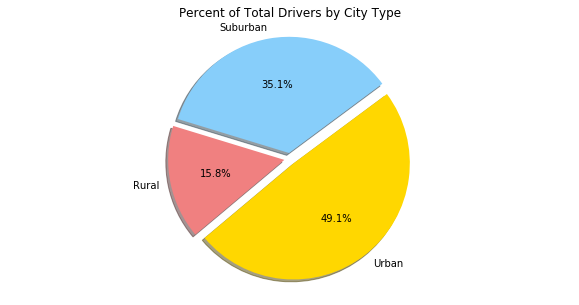

In [400]:
labels = ["Urban","Suburban","Rural"]
data = [total_urban_rides, total_suburban_rides, total_rural_rides]
colors = ['gold','lightskyblue','lightcoral']
explode = (0.05, 0.05, 0.05)
plt.pie(data, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=220 )
plt.title("Percent of Total Drivers by City Type")
plt.axis('equal')
plt.show()

In [401]:
total_urban_drivers = urban_df["total_rides"].sum()
total_suburban_drivers = suburban_df["total_rides"].sum()
total_rural_drivers = rural_df["total_rides"].sum()

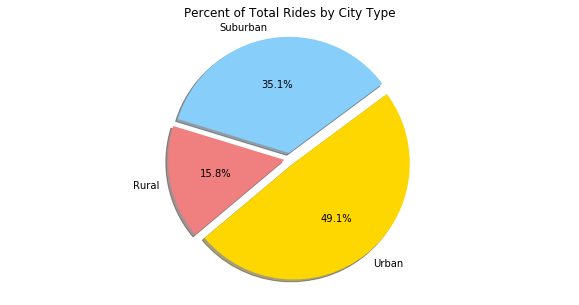

In [402]:
labels = ["Urban","Suburban","Rural"]
data = [total_urban_drivers, total_suburban_drivers, total_rural_drivers]
colors = ['gold','lightskyblue','lightcoral']
explode = (0.05, 0.05, 0.05)
plt.pie(data, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=220 )
plt.title("Percent of Total Rides by City Type")
plt.axis('equal')
plt.show()